In [ ]:
# Library importation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Flatten,Dropout
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix

In [ ]:
#Load of CIFAR-10 dataset
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
#Display data shape
print("x train shape:", x_train.shape)
print("y train shape:",y_train.shape)
print("x test shape:",x_test.shape)
print("y test shape:",y_test.shape)

x train shape: (50000, 32, 32, 3)
y train shape: (50000, 1)
x test shape: (10000, 32, 32, 3)
y test shape: (10000, 1)


In [ ]:
#Conversion target(0-9) to categorical (one-hot encoding)
number_of_class = 10
y_train = to_categorical(y_train,num_classes = number_of_class)
y_test = to_categorical(y_test,num_classes = number_of_class)

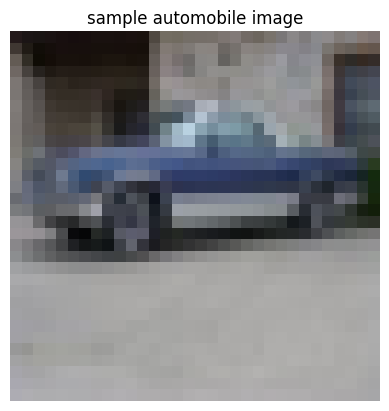

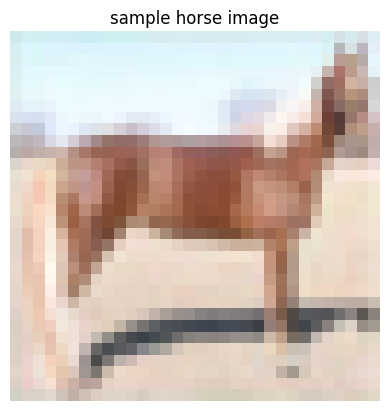

In [ ]:
#Visualisation of image train
plt.imshow(x_train[10000])
plt.axis("off")
plt.title("sample automobile image")
plt.show()

plt.figure()

plt.imshow(x_train[20010])
plt.title("sample horse image")
plt.axis("off")
plt.show()

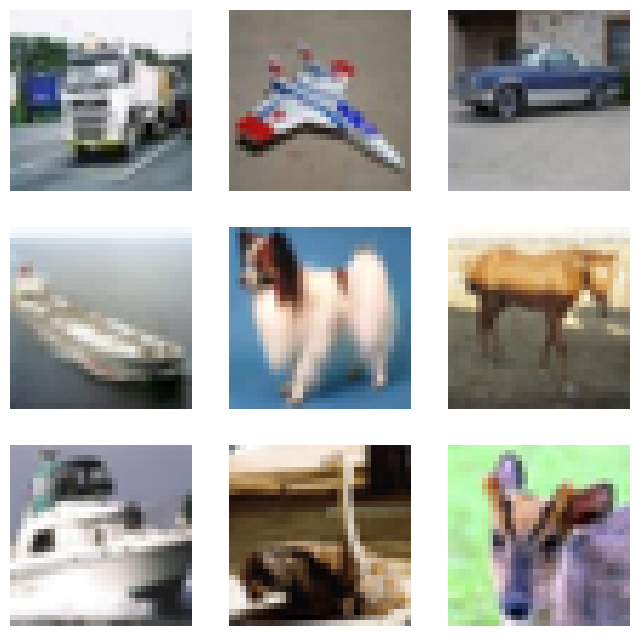

In [ ]:
#Diplay a table of 9 images train
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

axs[0, 0].imshow(x_train[1000])
axs[0, 0].axis("off")

axs[1, 0].imshow(x_train[2003])
axs[1, 0].axis("off")


axs[0, 1].imshow(x_train[30])
axs[0, 1].axis("off")


axs[1, 1].imshow(x_train[4000])
axs[1, 1].axis("off")


axs[0, 2].imshow(x_train[10000])
axs[0, 2].axis("off")


axs[1, 2].imshow(x_train[2000])
axs[1, 2].axis("off")


axs[2, 2].imshow(x_train[3001])
axs[2, 2].axis("off")


axs[2, 0].imshow(x_train[4001])
axs[2, 0].axis("off")


axs[2, 1].imshow(x_train[4008])
axs[2, 1].axis("off")

plt.show()


In [ ]:

def resize(img):
    numberofImage = img.shape[0]
    new_array = np.zeros((numberofImage,48,48,3))
    for i in range(numberofImage):
        new_array[i] = tf.image.resize(img[i],(48,48))
    return new_array

In [ ]:
x_train_i = resize(x_train)

In [ ]:
print("x train_i shape:",x_train_i.shape)

x train_i shape: (50000, 48, 48, 3)


In [ ]:
x_test_i = resize(x_test)

In [ ]:
print("x test_i shape:",x_test_i.shape)

x test_i shape: (10000, 48, 48, 3)


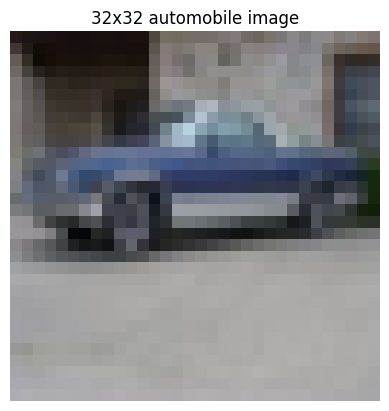

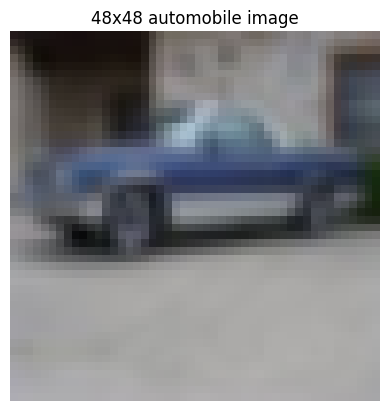

In [ ]:
plt.imshow(x_train[10000])
plt.axis("off")
plt.title("32x32 automobile image")
plt.show()

plt.figure()

plt.imshow(x_train_i[10000].astype(np.uint8))
plt.axis("off")
plt.title("48x48 automobile image")
plt.show()

In [ ]:
vgg19 = VGG19(include_top = False, weights = "imagenet", input_shape = (48,48,3))

In [ ]:
vgg19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
vgg19.layers

[<InputLayer name=input_layer_3, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <Conv2D name=block3_conv4, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <Conv2D name=block4_conv4, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <Conv2D name=block5_conv4, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [ ]:
model = Sequential()
for layer in vgg19.layers:
    model.add(layer)

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = number_of_class, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,189,898 (77.02 MB)

 Trainable params: 165,514 (646.54 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
epochs = 25
batch_size = 500
steps_per_epoch = (x_train_i[0] // batch_size)

In [ ]:
hist = model.fit(x_train_i, y_train, validation_split = 0.1,
                epochs = epochs, batch_size = batch_size)


Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 175ms/step - accuracy: 0.1702 - loss: 8.5863 - val_accuracy: 0.2372 - val_loss: 2.1333
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 159ms/step - accuracy: 0.2526 - loss: 2.1153 - val_accuracy: 0.4536 - val_loss: 1.6345
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - accuracy: 0.3682 - loss: 1.8048 - val_accuracy: 0.5118 - val_loss: 1.4646
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 153ms/step - accuracy: 0.4422 - loss: 1.6152 - val_accuracy: 0.5572 - val_loss: 1.3446
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.4883 - loss: 1.4978 - val_accuracy: 0.5716 - val_loss: 1.2989
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - accuracy: 0.5157 - loss: 1.4319 - val_accuracy: 0.5826 - val_loss: 1.2557
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.5346 - loss: 1.3693 - val_accuracy: 0.5946 - val_loss: 1.2116
Epoch 8/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.5540 - loss: 1.3251 - val_accu

In [ ]:
# with epoch = 20 and batch =
# COMMENT : We have a overfitting here because the validation accuracy courb exceed the trainning accuracy one
plt.figure(figsize=(6,6))
plt.plot(hist.history['loss'], color='b', label="Training loss")
plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

plt.figure()

plt.figure(figsize=(6,6))
plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
plt.legend(loc = "lower right")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


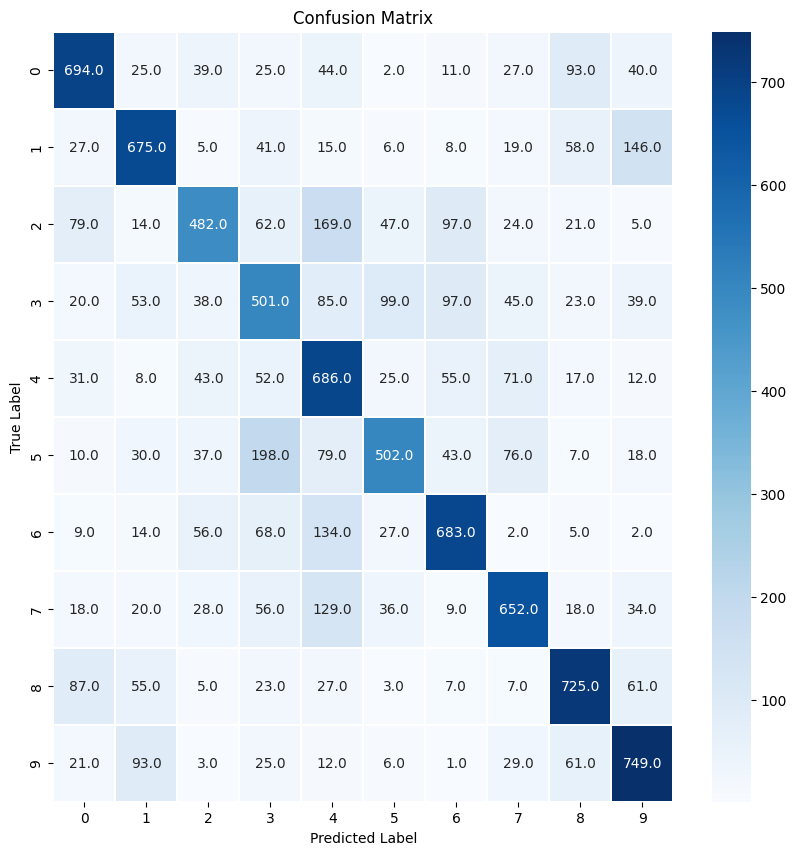

In [ ]:
y_predict=model.predict(x_test_i)
y_predict_classes=np.argmax(y_predict,axis=1)
y_true=np.argmax(y_test,axis=1)
confusion_mtx=confusion_matrix(y_true,y_predict_classes)
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.01,cmap="Blues",linecolor="white",fmt=".1f",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()